In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load CIFAR-10 data
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor()
])

train_data_cifar = datasets.CIFAR10('data_cifar', train=True, download=True, transform=transform)
test_data_cifar = datasets.CIFAR10('data_cifar', train=False, download=True, transform=transform)

train_loader_cifar = DataLoader(train_data_cifar, batch_size=64, shuffle=True)
test_loader_cifar = DataLoader(test_data_cifar, batch_size=64, shuffle=True)



Files already downloaded and verified
Files already downloaded and verified


In [5]:
#load mnist dataset

transform = transforms.Compose([
    transforms.ToTensor()
])

train_data_mnist = datasets.MNIST('data_mnist', train=True, download=True, transform=transform)
test_data_mnist = datasets.MNIST('data_mnist', train=False, download=True, transform=transform)

train_loader_mnist = DataLoader(train_data_mnist, batch_size=64, shuffle=True)
test_loader_mnist = DataLoader(test_data_mnist, batch_size=64, shuffle=True)


### Patch a Single Image

torch.Size([28, 28]) 5


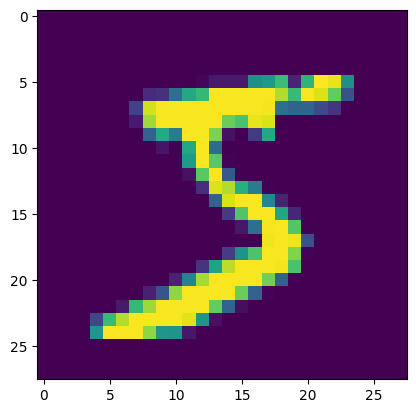

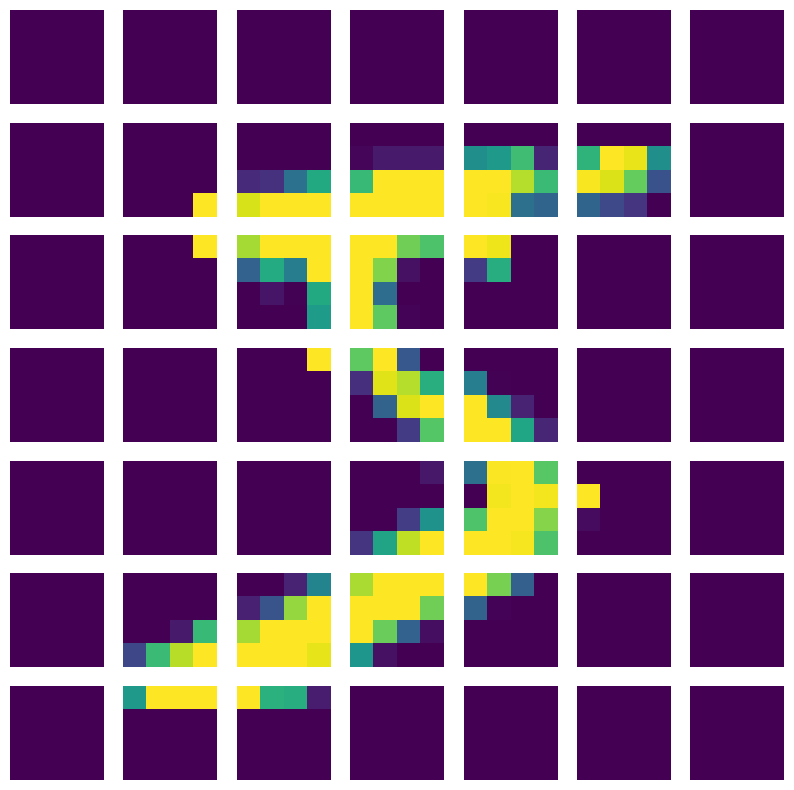

In [6]:
#patch a single image from the MNIST dataset
patch_size = 4
image_size = 28

image, label = train_data_mnist[0]
image = image.squeeze()
print(image.shape, label)
patches = image.reshape(image_size//patch_size, patch_size, -1, patch_size).swapaxes(1,2).reshape(-1, patch_size, patch_size)

plt.imshow(image)
plt.show()

plt.figure(figsize=(10, 10))
for i in range(patches.shape[0]):
    plt.subplot(7, 7, i+1)
    plt.imshow(patches[i])
    plt.axis('off')